In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
(df['Churn'].value_counts()*100/len(df))

# from this it is clear that 73.5% people are not going to churn while 26.5% people 
# are not going to churn 

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

<Axes: xlabel='Churn'>

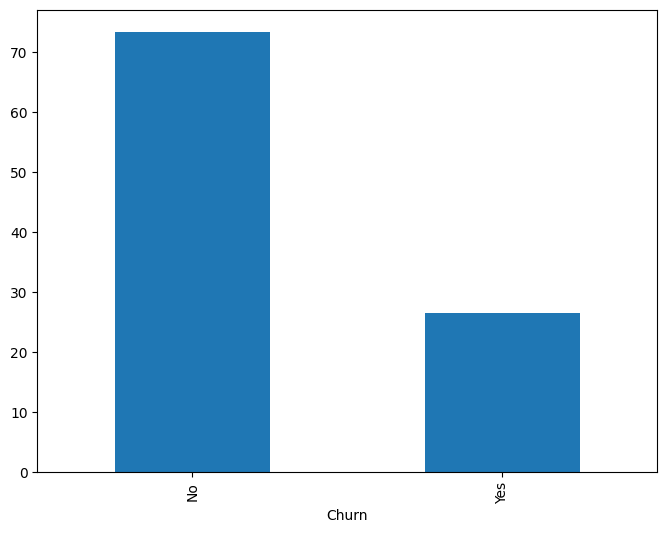

In [7]:
(df['Churn'].value_counts()*100/len(df)).plot(kind='bar',figsize=(8,6)) # to see the churn rate 

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
for columns in df.columns.values:
    print(columns)
    print(df[columns].unique())

# hence Partner,Dependents,PhoneServices,Churn are the columns which have yes and no as its value

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [10]:
# our main objective is to find out whether a customer is likely to churn or not
# for this we need to take into consideration the following columns
# 1.SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity, MonthlyCharges,TotalCharges according to me
newdf=df[['tenure','SeniorCitizen','PhoneService','MultipleLines','InternetService','OnlineSecurity','MonthlyCharges','TotalCharges','gender','Churn']]

In [11]:
newdf.head()

,tenure,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,MonthlyCharges,TotalCharges,gender,Churn
0,1,0,No,No phone service,DSL,No,29.85,29.85,Female,No
1,34,0,Yes,No,DSL,Yes,56.95,1889.5,Male,No
2,2,0,Yes,No,DSL,Yes,53.85,108.15,Male,Yes
3,45,0,No,No phone service,DSL,Yes,42.30,1840.75,Male,No
4,2,0,Yes,No,Fiber optic,No,70.70,151.65,Female,Yes


In [12]:
gender_map={'Male':1 ,'Female':0}
newdf['gender']=df['gender'].map(gender_map)
bool_map={'Yes':1,'No':0}
bool_col= [ 'PhoneService' , 'Churn']

for col in bool_col:
    newdf[col]=df[col].map(bool_map)

C:\Users\veer\AppData\Local\Temp\ipykernel_7748\668027587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['gender']=df['gender'].map(gender_map)
C:\Users\veer\AppData\Local\Temp\ipykernel_7748\668027587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[col]=df[col].map(bool_map)
C:\Users\veer\AppData\Local\Temp\ipykernel_7748\668027587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [13]:
newdf.head()

# make categorical columns to numerical for easy analysis

,tenure,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,MonthlyCharges,TotalCharges,gender,Churn
0,1,0,0,No phone service,DSL,No,29.85,29.85,0,0
1,34,0,1,No,DSL,Yes,56.95,1889.5,1,0
2,2,0,1,No,DSL,Yes,53.85,108.15,1,1
3,45,0,0,No phone service,DSL,Yes,42.30,1840.75,1,0
4,2,0,1,No,Fiber optic,No,70.70,151.65,0,1


In [14]:
newdf.dropna()

,tenure,SeniorCitizen,PhoneService,MultipleLines,InternetService,OnlineSecurity,MonthlyCharges,TotalCharges,gender,Churn
0,1,0,0,No phone service,DSL,No,29.85,29.85,0,0
1,34,0,1,No,DSL,Yes,56.95,1889.5,1,0
2,2,0,1,No,DSL,Yes,53.85,108.15,1,1
3,45,0,0,No phone service,DSL,Yes,42.30,1840.75,1,0
4,2,0,1,No,Fiber optic,No,70.70,151.65,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,24,0,1,Yes,DSL,Yes,84.80,1990.5,1,0
7039,72,0,1,Yes,Fiber optic,No,103.20,7362.9,0,0
7040,11,0,0,No phone service,DSL,Yes,29.60,346.45,0,0
7041,4,1,1,Yes,Fiber optic,No,74.40,306.6,1,1


In [15]:
newdf.sort_values

<bound method DataFrame.sort_values of       tenure  SeniorCitizen  PhoneService     MultipleLines InternetService  \
0          1              0             0  No phone service             DSL   
1         34              0             1                No             DSL   
2          2              0             1                No             DSL   
3         45              0             0  No phone service             DSL   
4          2              0             1                No     Fiber optic   
...      ...            ...           ...               ...             ...   
7038      24              0             1               Yes             DSL   
7039      72              0             1               Yes     Fiber optic   
7040      11              0             0  No phone service             DSL   
7041       4              1             1               Yes     Fiber optic   
7042      66              0             1                No     Fiber optic   

     OnlineS

In [16]:
newdf.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool>

In [17]:
# make all column names lowercase
newdf.columns = map(str.lower, newdf.columns)

In [18]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   seniorcitizen    7043 non-null   int64  
 2   phoneservice     7043 non-null   int64  
 3   multiplelines    7043 non-null   object 
 4   internetservice  7043 non-null   object 
 5   onlinesecurity   7043 non-null   object 
 6   monthlycharges   7043 non-null   float64
 7   totalcharges     7043 non-null   object 
 8   gender           7043 non-null   int64  
 9   churn            7043 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 550.4+ KB


In [19]:
newdf.head()

,tenure,seniorcitizen,phoneservice,multiplelines,internetservice,onlinesecurity,monthlycharges,totalcharges,gender,churn
0,1,0,0,No phone service,DSL,No,29.85,29.85,0,0
1,34,0,1,No,DSL,Yes,56.95,1889.5,1,0
2,2,0,1,No,DSL,Yes,53.85,108.15,1,1
3,45,0,0,No phone service,DSL,Yes,42.30,1840.75,1,0
4,2,0,1,No,Fiber optic,No,70.70,151.65,0,1


PLOTS


NUMERICAL COLUMNS

In [20]:
newdf.totalcharges=newdf.totalcharges.replace(" ",0)
newdf.totalcharges=newdf.totalcharges.astype('float32')

C:\Users\veer\AppData\Local\Temp\ipykernel_7748\3696123694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.totalcharges=newdf.totalcharges.replace(" ",0)
C:\Users\veer\AppData\Local\Temp\ipykernel_7748\3696123694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.totalcharges=newdf.totalcharges.astype('float32')


In [21]:
print(newdf['totalcharges'].corr(newdf['churn']))
print(newdf['totalcharges'].corr(newdf['seniorcitizen']))
print(newdf['totalcharges'].corr(newdf['tenure']))
print(newdf['totalcharges'].corr(newdf['phoneservice']))
print(newdf['totalcharges'].corr(newdf['monthlycharges']))


# from this we can understand that the relation of totalcharges with seniorcitizen is the 
# among the columns and then with phoneservice  and then with churn then with monthlyharges that of with tenure


-0.1983242631301948
0.10300618432182759
0.8261783979021463
0.11321354460434378
0.6511738315382194


<Axes: ylabel='count'>

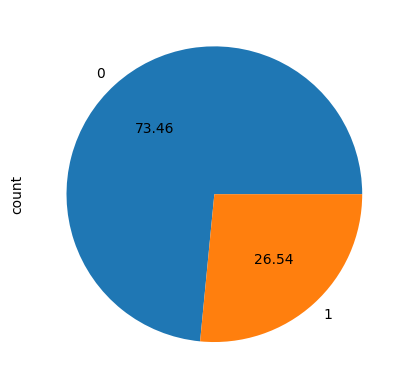

In [22]:
newdf['churn'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='totalcharges', ylabel='Density'>

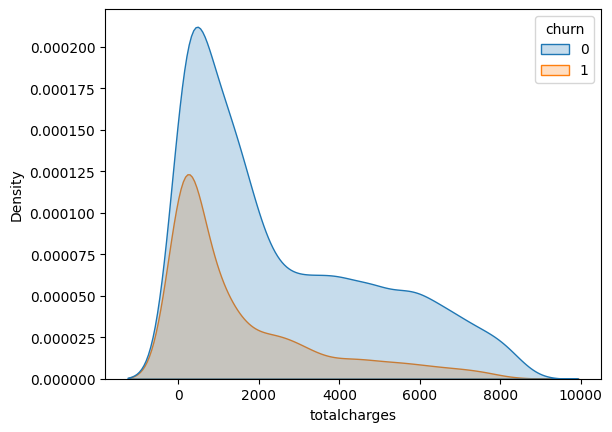

In [23]:
sns.kdeplot(data=newdf,x='totalcharges',hue='churn',fill=True)


<Axes: xlabel='tenure', ylabel='Density'>

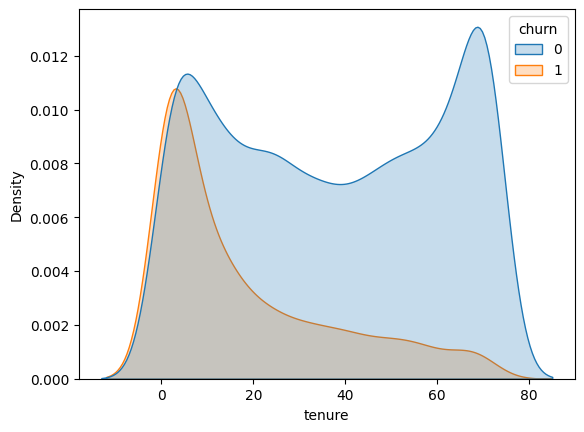

In [24]:
sns.kdeplot(data=newdf,x='tenure',hue='churn',fill=True)

<Axes: xlabel='monthlycharges', ylabel='Density'>

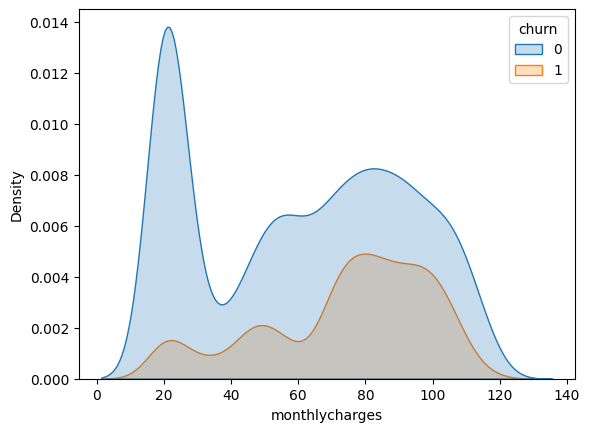

In [25]:
sns.kdeplot(data=newdf,x='monthlycharges',hue='churn',fill=True)

In [26]:
print(np.mean(newdf['monthlycharges']))
print(np.mean(newdf['totalcharges']))
print(np.mean(newdf['tenure']))

64.76169246059918
2279.7344
32.37114865824223


<Axes: xlabel='monthlycharges', ylabel='Count'>

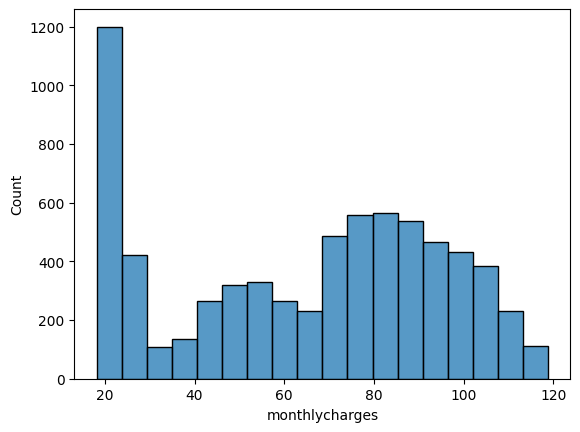

In [27]:
sns.histplot(data=newdf,x='monthlycharges')

<Axes: xlabel='tenure', ylabel='Count'>

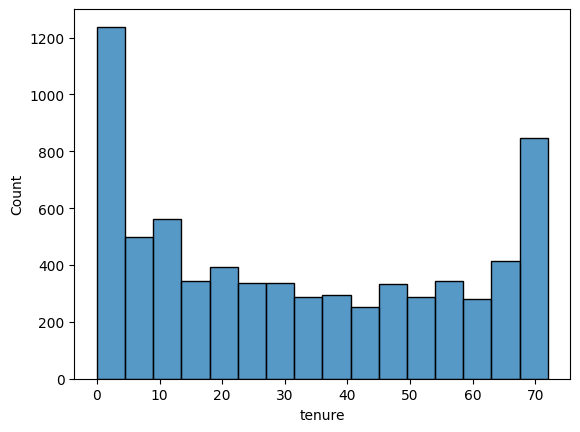

In [28]:
sns.histplot(data=newdf,x='tenure')

From the above data it is appropriate to say the following:

monthlycharges : people having montly charges of 0 to 20 dollars are having least churn rate 
while those between 20 to 64 have moderate and those above the 64 have churn rate relatively increasing

totalcharges : it is dependent on monthly charges

tenure : people with least tenure(new_customer) have more churn rate while above average that is 32years have least churn rate

GENDER


<Axes: ylabel='count'>

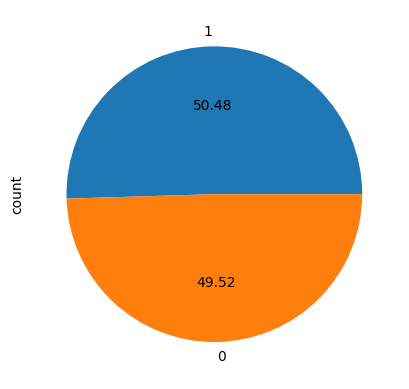

In [29]:
newdf['gender'].value_counts().plot(kind='pie',autopct='%.2f')

Gender: from the pie chart it is clear that the gender column has no effect on the churn rate

In [30]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   seniorcitizen    7043 non-null   int64  
 2   phoneservice     7043 non-null   int64  
 3   multiplelines    7043 non-null   object 
 4   internetservice  7043 non-null   object 
 5   onlinesecurity   7043 non-null   object 
 6   monthlycharges   7043 non-null   float64
 7   totalcharges     7043 non-null   float32
 8   gender           7043 non-null   int64  
 9   churn            7043 non-null   int64  
dtypes: float32(1), float64(1), int64(5), object(3)
memory usage: 522.9+ KB


<Axes: ylabel='count'>

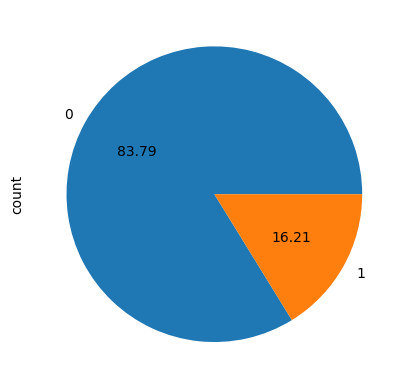

In [31]:
newdf['seniorcitizen'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='seniorcitizen', ylabel='monthlycharges'>

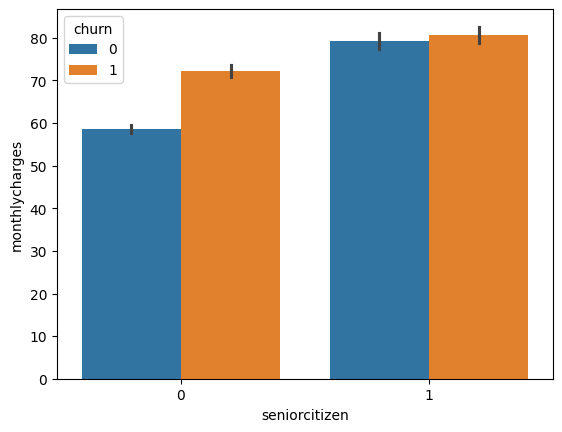

In [32]:
sns.barplot(data=newdf,x='seniorcitizen',y='monthlycharges',hue='churn')


From age perspective:
1. our dataset has very less percentage of senior_citizen(16% only)
2. The churn rate is more in non_senior citizen 
3. The monthlycharges for churn rate for seniorcitizen is more than that of non_senior citizen

In [33]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   seniorcitizen    7043 non-null   int64  
 2   phoneservice     7043 non-null   int64  
 3   multiplelines    7043 non-null   object 
 4   internetservice  7043 non-null   object 
 5   onlinesecurity   7043 non-null   object 
 6   monthlycharges   7043 non-null   float64
 7   totalcharges     7043 non-null   float32
 8   gender           7043 non-null   int64  
 9   churn            7043 non-null   int64  
dtypes: float32(1), float64(1), int64(5), object(3)
memory usage: 522.9+ KB


phoneservice,multiplelines,internetservice,onlinesecurity

Axes(0.22375,0.11;0.5775x0.77)


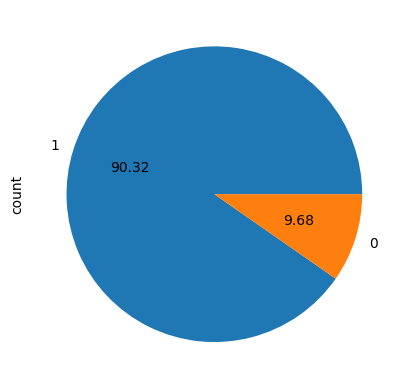

In [34]:
print((newdf['phoneservice'].value_counts()*100/len(newdf)).plot(kind='pie',autopct='%.2f'))

<Axes: xlabel='phoneservice', ylabel='monthlycharges'>

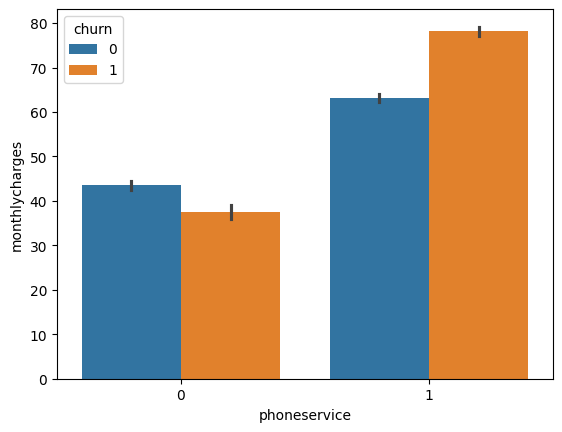

In [35]:
sns.barplot(data=newdf,x='phoneservice',y='monthlycharges',hue='churn')

<Axes: xlabel='multiplelines', ylabel='monthlycharges'>

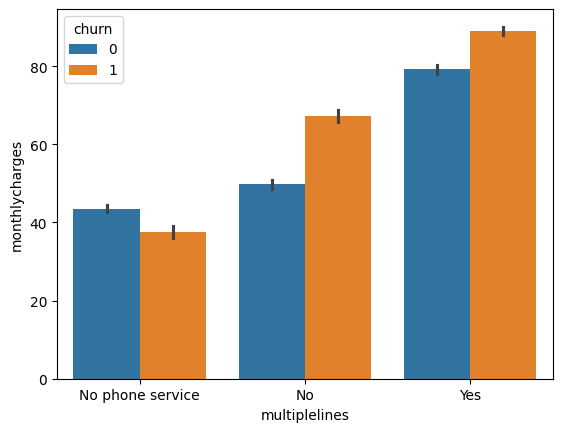

In [36]:
sns.barplot(data=newdf,x='multiplelines',y='monthlycharges',hue='churn')

<Axes: xlabel='internetservice', ylabel='monthlycharges'>

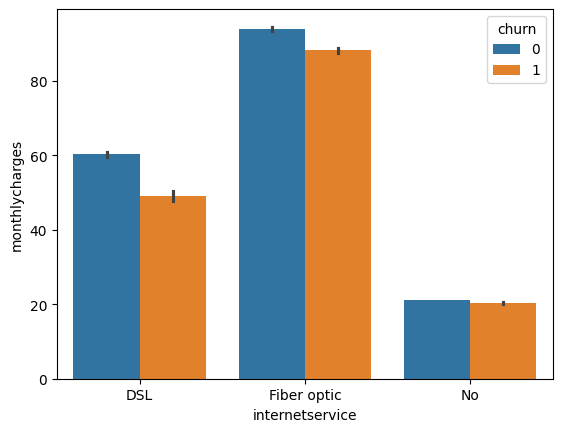

In [37]:
sns.barplot(data=newdf,x='internetservice',y='monthlycharges',hue='churn')

<Axes: xlabel='onlinesecurity', ylabel='monthlycharges'>

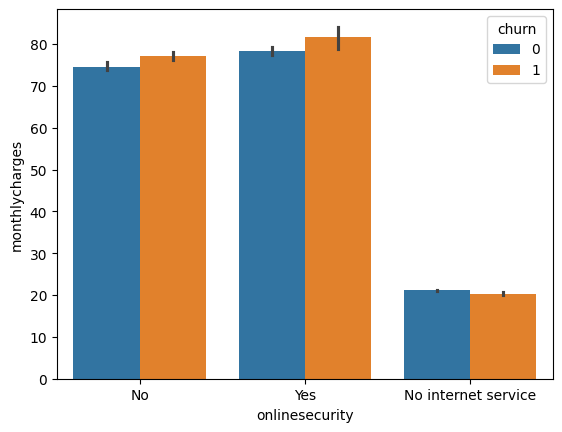

In [38]:
sns.barplot(data=newdf,x='onlinesecurity',y='monthlycharges',hue='churn')

From the above graphs 
phoneservice : people who opt for phoneservice whose monthly charges are less than 65 dollars
are less likely to churn than those for above 65 dollars

multiplelines: for multiplelines who opt for it having monthlycharge within 80 dollars are less
likely to churn 
for those who do not opt having less than 65 dollar are less likely to churn

internetservice:1.Fibreoptic: in fibreoptic people who opt having equal chances to churn as their bill are around 85 dollars

2.DSL: for dsl people with 60dollars and below are less likely to churn 

internetsecurity: for this the ratio are almost similar for churn who opt or not opt it.


Logistic Regression

In [39]:
# Define features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [40]:
# converting the categorical columns to numerical columns
X = pd.get_dummies(X, drop_first=True)

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [45]:
# Evaluate performance
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC-AUC: {roc_auc}')

              precision    recall  f1-score   support

          No       0.76      0.98      0.86      1036
         Yes       0.76      0.14      0.24       373

    accuracy                           0.76      1409
   macro avg       0.76      0.56      0.55      1409
weighted avg       0.76      0.76      0.70      1409

ROC-AUC: 0.8371145465649488
